In [1]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
%matplotlib inline

def biseccion(a,b,f,tipo):
    # se aproxima el cero de f dentro del 
    # intervalo (a,b) usando un esquema de 
    # iteracion dado por el "flag" tipo:
    # tipo -> (nsteps [0], epsilon [1])
    if f(a)*f(b) > 0:
        print('el intervalo no contiene un cero de la funcion')
        return None
    else:
        if tipo==0:
            nsteps = int(input('seleccione el numero de iteraciones: '))
            for i in range(nsteps+1):
                c = (a+b)/2
                if f(a)*f(c) < 0:
                    b = c
                else:
                    a = c
            return c
        elif tipo==1:
            epsilon = float(input('seleccione el error permitido: '))
            while (b-a)/2 > epsilon:
                c = (a+b)/2
                if f(a)*f(c) < 0:
                    b = c
                else:
                    a = c
            return c

def regula_falsi(a,b,f,tipo):
    if f(a)*f(b) > 0:
        print('el intervalo no contiene un cero de la funcion')
        return None
    else:
        if tipo==0:
            nsteps = int(input('seleccione el numero de iteraciones: '))
            for i in range(nsteps+1):
                c = a - f(a)*(b-a)/(f(b)-f(a))
                if f(a)*f(c) < 0:
                    b = c
                else:
                    a = c
            return c
        elif tipo==1:
            epsilon = float(input('seleccione el error permitido: '))
            while (b-a)/2 > epsilon:
                c = a - f(a)*(b-a)/(f(b)-f(a))
                if f(a)*f(c) < 0:
                    b = c
                else:
                    a = c
            return c
        
def newton(f,x0,niter):
    x = sym.symbols('x')
    def df(x):
        return sym.diff(f(x),x)
    DerivF = sym.lambdify(x,df(x),'numpy')
    xold = x0
    for i in range(niter):
        xnew = xold - f(xold)/DerivF(xold)
        xold = xnew
        
    return xnew

def secante(f,x0,x1,niter):
    xold1 = x0
    xold2 = x1
    for i in range(niter):
        xnew = xold1 - f(xold1)*(xold2-xold1)/(f(xold2)-f(xold1))
        xold2 = xold1
        xold1 = xnew
        
    return xnew

seleccione el numero de iteraciones: 1
seleccione el numero de iteraciones: 1
solucion por biseccion =  0.25
solucion por regula-falsi =  0.5014385042355459


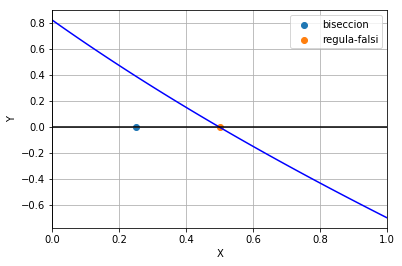

In [33]:
# SOLUCION PRIMER PUNTO 
def f(x):
    return m.exp(-x-0.2)-x

x1 = biseccion(0,1,f,0)
x2 = regula_falsi(0,1,f,0)
print('solucion por biseccion = ', x1)
print('solucion por regula-falsi = ',x2)

xx = np.linspace(0,1,100)
vf = np.vectorize(f)
yy = vf(xx)

plt.plot(xx,yy,'b-')
plt.scatter(x1,0,label='biseccion')
plt.scatter(x2,0,label='regula-falsi')
plt.xlim([0,1])
plt.axhline(y=0,color = 'k',label=None)
plt.axvline(x=0,color = 'k',label=None)
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.legend()

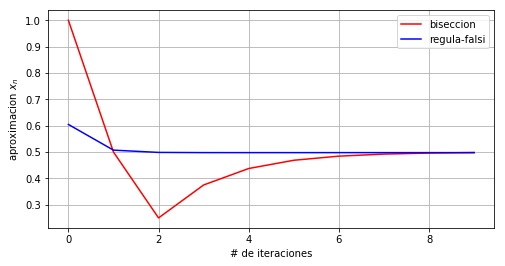

In [52]:
def root(a,b,f,niter,method):
    if f(a)*f(b) > 0:
        print('el intervalo no contiene un cero de la funcion')
        return None
    else:
        for i in range(niter+1):
            if method=='biseccion':
                c = (a+b)/2
            elif method=='regula-falsi':
                c = a - f(a)*(b-a)/(f(b)-f(a))
            else:
                print('ERROR: metodo no implementado')
                return None
            if f(a)*f(c) < 0:
                b = c
            else:
                a = c
        return c

list1 = []
list2 = []
a = 0
b = 2
plt.figure(figsize=(8,4))
for i in range(10):
    list1.append(root(a,b,f,i,'biseccion'))
    list2.append(root(a,b,f,i,'regula-falsi'))
plt.plot(list1,'r',label='biseccion')
plt.plot(list2,'b',label='regula-falsi')
plt.xlabel(r'# de iteraciones')
plt.ylabel(r'aproximacion $x_n$')
plt.legend()
plt.grid(True)

iteracion #  1  =  -1.0
iteracion #  2  =  1.0
iteracion #  3  =  -1.0
iteracion #  4  =  1.0
iteracion #  5  =  -1.0
 -- Se observa que las iteraciones oscilan entre dos valores -- 


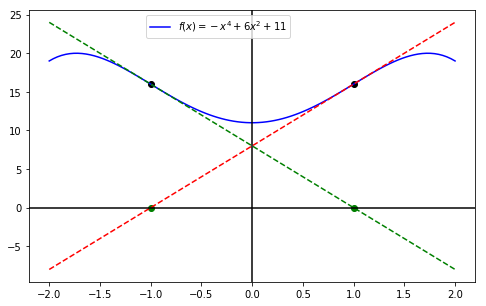

In [64]:
#SOLUCION SEGUNDO PUNTO 
def tangente(f,x0,x):
    var = sym.symbols('var')
    def df(var):
        return sym.diff(f(var),var)
    DerivF = sym.lambdify(var,df(var),'numpy')
    return f(x0)+DerivF(x0)*(x-x0)

def g(x):
    return -pow(x,4)+6*pow(x,2)+11
for i in range(1,6):
    print('iteracion # ',i,' = ',newton(g,1,i))
    
print(' -- Se observa que las iteraciones oscilan entre dos valores -- ')
xx = np.linspace(-2,2,100)
vg = np.vectorize(g)
vtang = np.vectorize(tangente)
yy = vg(xx)
yy_tan = vtang(g,1,xx)
yy_tan2  = vtang(g,-1,xx)

plt.figure(figsize=(8,5))
plt.plot(xx,yy,'b-',label=r'$f(x) = -x^4+6x^2+11$')
plt.scatter([1,-1],[g(1),g(-1)],c='k')
plt.scatter([1,-1],[0,0],c='g')
plt.plot(xx,yy_tan,'r--')
plt.plot(xx,yy_tan2,'g--')
plt.axhline(y=0,color = 'k',label=None)
plt.axvline(x=0,color = 'k',label=None)
plt.legend(bbox_to_anchor=(0.25,1),loc=2)

(2, 4)

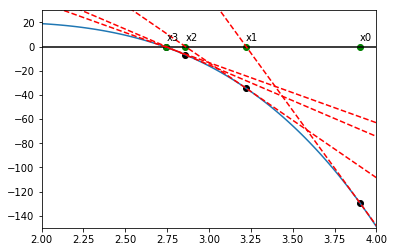

In [29]:
# El grafico anterior muestra que las rectas tangentes 
# cortan en puntos ciclicos, el metodo no converge
xx = np.linspace(2,4,100)
vg = np.vectorize(g)
yy = vg(xx)

plt.plot(xx,yy)
plt.axhline(y=0,color = 'k',label=None)

x_seq = [3.9]
for i in range(1,5):
    yyt = vtang(g,x_seq[i-1],xx)
    plt.scatter(x_seq[i-1],g(x_seq[i-1]),c='k')
    plt.scatter(x_seq[i-1],0,c='g')
    plt.text(x_seq[i-1],5,'x'+str(i-1))
    plt.plot(xx,yyt,'r--')
    x_seq.append(newton(g,x_seq[i-1],1))

plt.ylim([-150,30])
plt.xlim([2,4])